<a href="https://colab.research.google.com/github/jx-dohwan/Natural-Language-Processing-using-Transformers/blob/main/CH3_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 트랜스포머 파헤치기
- 이 장에서는 트랜스포머가 어떻게 동작하는지 알아보도록 하겠다.
- 트랜스포머 모델의 주요 구성 요소와 이를 파이토치로 구현하는 방법을 알아보겠다.
- 먼저 어텐션 메커니즘을 만드는 데 초점을 맞춘 다음, 트랜스포머 인코더를 구현하기 위해 필요한 요소를 추가하겠다.
- 인코더와 디코더 모듈의 구조적인 차이점도 간략하게 둘러보겠다.


## 트랜스포머 아키텍처
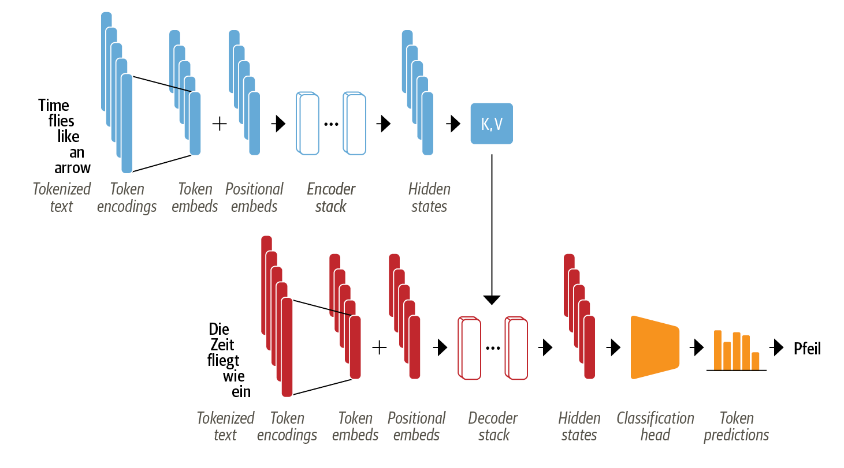
- 트랜스포머는 인코더-디코더 구조를 가진다.
  - 인코더 : 입력 토큰의 시퀀스를 은닉상태(hidden state) 또는 문맥(context이라고 부르는 임베딩 벡터의 시퀀스로 변환한다.
  - 디코더 : 인코더의 은닉상태를 사용해 출력 토큰의 시퀀스를 한 번에 하나씩 반복적으로 생성한다. 
- 트랜스포머의 특징
  - 입력 텍스트를 토큰화하고 토큰 임베딩으로 변환한다. 어텐션 메커니즘은 토큰의 상대적인 위치를 알지 못한다. 따라서 텍스트 순서 특징을 모델링하기 위해 입력에 토큰 위치에 관한 정보를 주입할 방법이 필요하다. 이를 위해 각 토큰의 위치 정보가 담긴 위치 임베딩(positional embedding)을 토큰 임베딩과 합친다.
  - 인코더가 인코더층의 스택 또는 '블록'으로 구성되는데, 이는 컴퓨터 비전에서 합성곱 층의 스택과 유사하다. 디코더도 마찬가지로 디코더 층의 스택으로 구성된다.
  - 디코더 층마다 인코더의 출력이 주입된다. 디코더는 시퀀스에서 가장 가능성 잇는 다음 토큰을 예측한다. 이 단계의 출력이 디코더로 다시 주입되어 다음 토큰을 생성한다. 이런 과정이 특수한 EOS 토큰에 도달할 때까지 계속된다.

- 트랜스포머의 유형
  - 인코더 유형
    - 이 모델은 텍스트 시퀀스 입력을 풍부한 수치 표현으로 변환한다.
    - 이 표현은 텍스트 분류나 개체명 인식 같은 작업에 잘 맞는다.
    - BERT를 비롯해 RoBERTa, DistilBERT같은 BERT 변종이 이 유형의 아키텍처에 속한다.
    - 양방향 어텐션이다.(오른쪽과 왼쪽이후의 문맥에 따라 달라진다.)
  - 디코더 유형
    - GPT 계열 모델이 이 유형에 해당한다.
    - 오직 왼쪽 문맥에 따라서 토큰에 대한 계산한 표현이 달라진다.
    - 코잘 어텐션 또는 자기회귀 어텐션이라고 한다.
  - 인코더-디코더 유형
    - 한 텍스트의 시퀀스를 다른 시퀀스로 매핑하는 복잡한 모델링에 사용한다.
    - 따라서 기계 번역과 요약 작업에 적합하다
    - 트랜스포머 아키텍처 외에 BART와 T5가 이 유형에 속한다.

## 인코더더